In [1]:
import numpy as np
import sklearn.datasets
import mglearn
import matplotlib.pyplot as plt

X.shape: (26, 2)


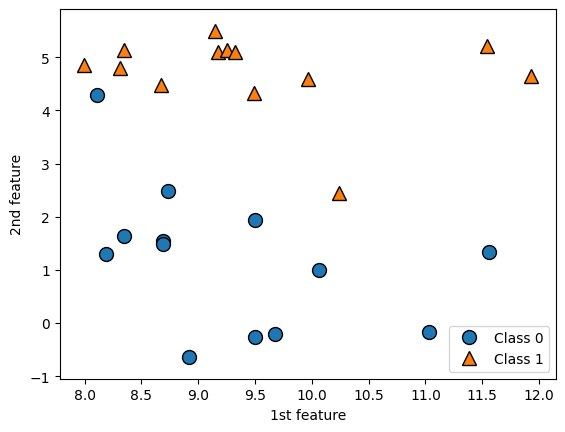

In [2]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("1st feature")
plt.ylabel("2nd feature")
print("X.shape: {}".format(X.shape))

target:  [0 2 0 0 2 1 0 1 1 1 2 2 2 0 0 1 1 2 0 2 0 1 2 1 0 1]
X.shape: (26, 2)


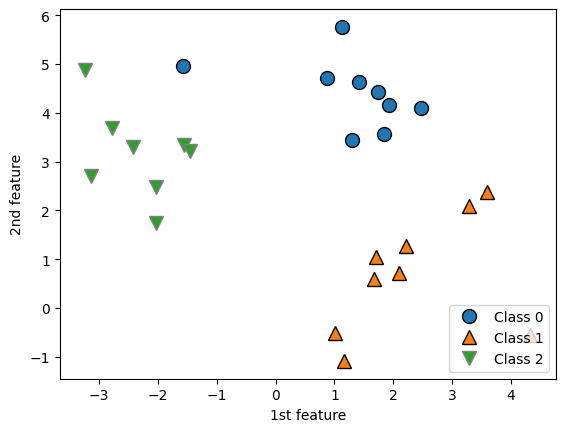

In [3]:
from sklearn.datasets._samples_generator import make_blobs
X, y = make_blobs(n_samples=26, n_features=2, random_state=0)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1", "Class 2"], loc=4)
plt.xlabel("1st feature")
plt.ylabel("2nd feature")

print("target: ", y)
print("X.shape: {}".format(X.shape))

Text(0, 0.5, 'target')

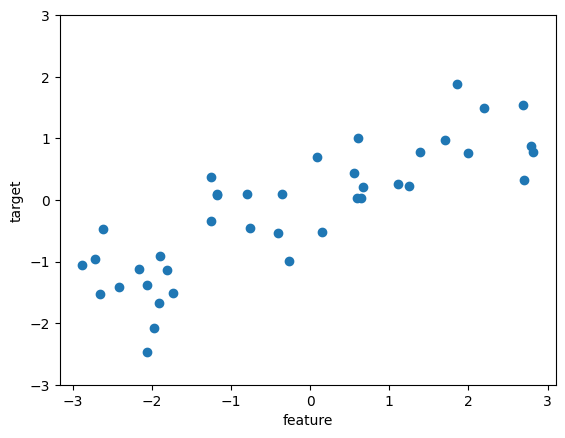

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("feature")
plt.ylabel("target")

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
print("feature names:\n{}".format(cancer.feature_names))

feature namesL
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [16]:
import pandas as pd
boston = pd.read_csv("BostonHousing.csv")
boston.shape


(506, 14)

In [14]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


### KNN

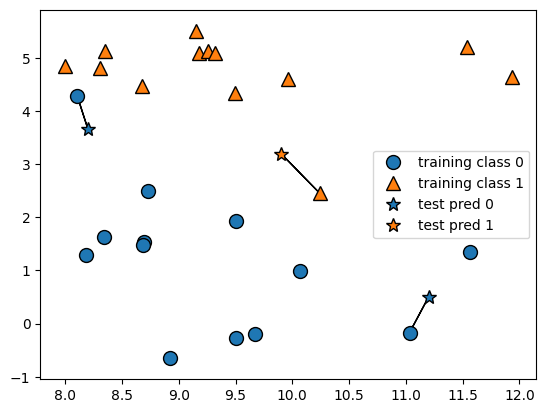

In [17]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

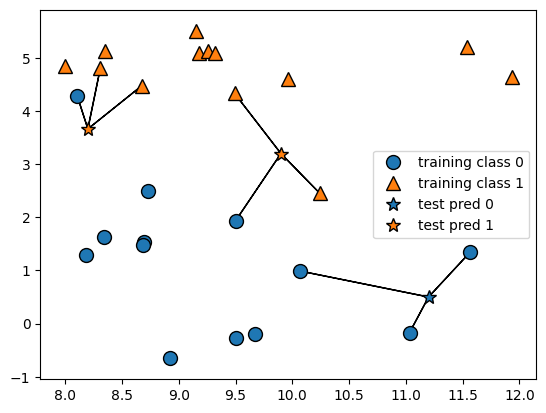

In [18]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [19]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [21]:
clf.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [25]:
print("test set: \n{}\n{}\n".format(X_test, y_test))
print("test set pred: {}".format(clf.predict(X_test)))

test set: 
[[11.54155807  5.21116083]
 [10.06393839  0.99078055]
 [ 9.49123469  4.33224792]
 [ 8.18378052  1.29564214]
 [ 8.30988863  4.80623966]
 [10.24028948  2.45544401]
 [ 8.34468785  1.63824349]]
[1 0 1 0 1 1 0]

test set pred: [1 0 1 0 1 0 0]


In [26]:
print("test set acc: {:.2f}".format(clf.score(X_test, y_test)))

test set acc: 0.86


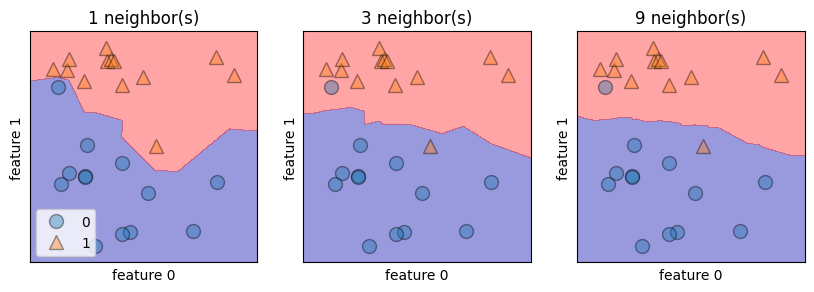

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax, alpha=.4)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

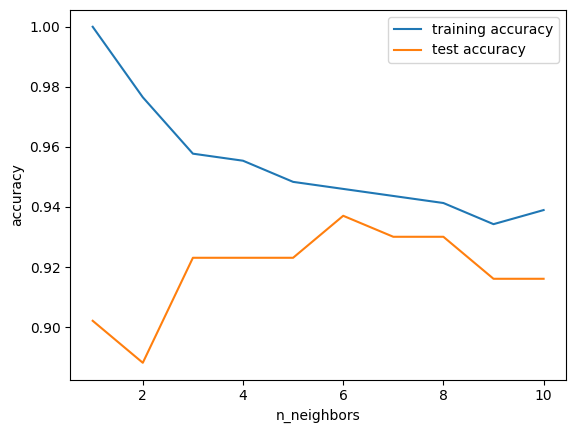

In [33]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_acc = []
test_acc = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_acc, label="training accuracy")
plt.plot(neighbors_settings, test_acc, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### k-Neighbors Regression

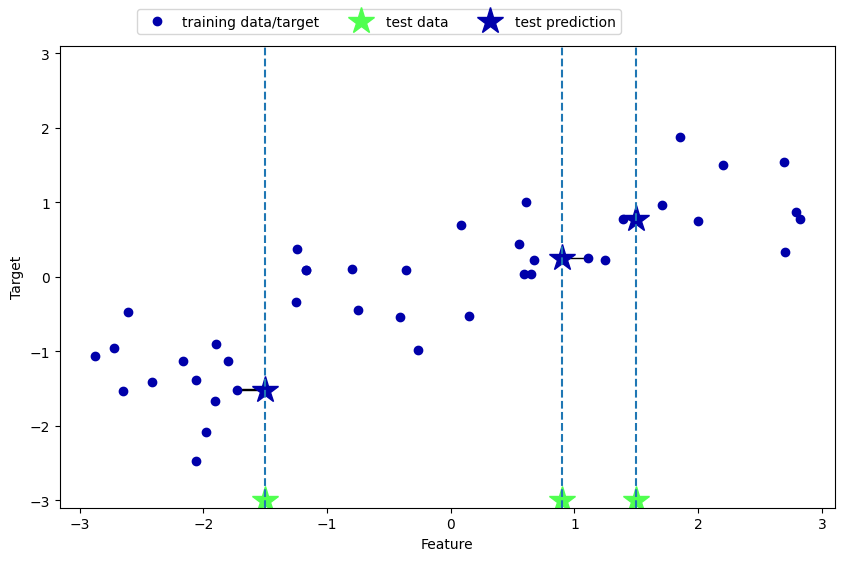

In [34]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

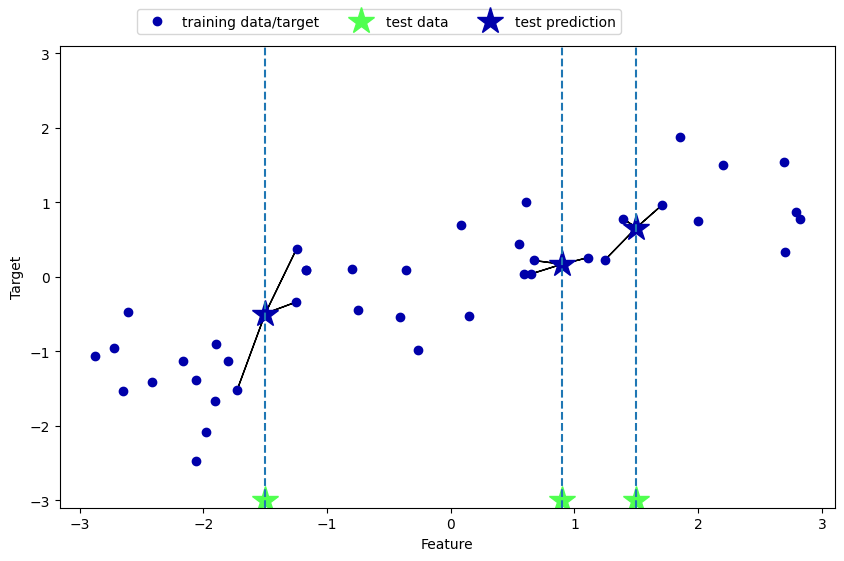

In [35]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [36]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

print("test set: \n{}\n{}\n".format(X_test, y_test))
print("test set predictions: \n{}".format(reg.predict(X_test)))

test set: 
[[-1.24713211]
 [ 0.67111737]
 [ 1.71105577]
 [-2.06388816]
 [-2.87649303]
 [-1.89957294]
 [ 0.55448741]
 [ 2.81945911]
 [-0.40832989]
 [-2.72129752]]
[ 0.37299129  0.21778193  0.96695428 -1.38773632 -1.05979555 -0.90496988
  0.43655826  0.7789638  -0.54114599 -0.95652133]

test set predictions: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [38]:
print("test set R2: {:.2f}".format(reg.score(X_test, y_test)))

test set R2: 0.83


### Analyzing KNeighborsRegressor

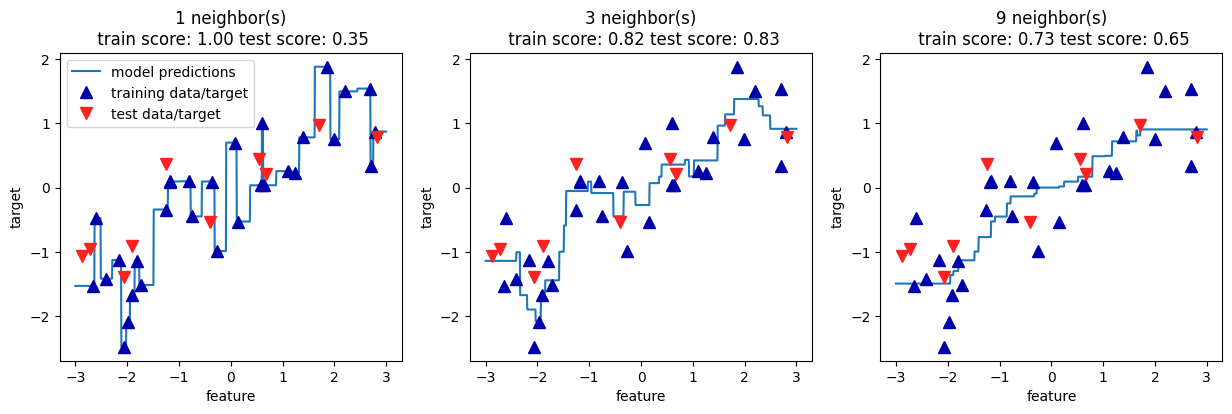

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    
axes[0].legend(["model predictions", "training data/target", "test data/target"], loc="best")